In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as patsy

%matplotlib inline

In [2]:
%reload_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

matplotlib : 3.8.4
patsy      : 0.5.6
statsmodels: 0.14.2
pandas     : 2.2.2
numpy      : 1.26.4
seaborn    : 0.13.2



In [5]:
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip']/tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, time e net_bill```.  
2. Remova as variáveis não significantes. 
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.


   total_bill   tip     sex smoker  day    time  size  net_bill   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2     15.98  0.063204
1       10.34  1.66    Male     No  Sun  Dinner     3      8.68  0.191244
2       21.01  3.50    Male     No  Sun  Dinner     3     17.51  0.199886
3       23.68  3.31    Male     No  Sun  Dinner     2     20.37  0.162494
4       24.59  3.61  Female     No  Sun  Dinner     4     20.98  0.172069
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.64e-20
Time:                        20:58:13   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df 

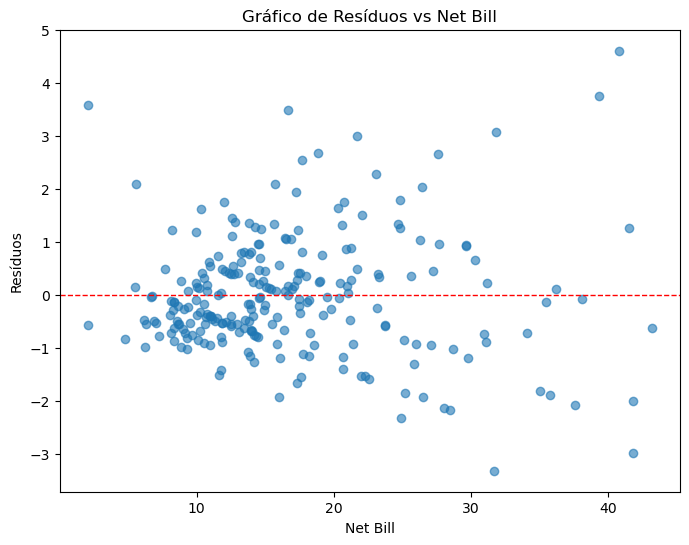

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.47
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.90e-19
Time:                        20:58:13   Log-Likelihood:                -382.27
No. Observations:                 244   AIC:                             770.5
Df Residuals:                     241   BIC:                             781.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2818      0.433     -2.

In [9]:
# Importar pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy

# Carregar o conjunto de dados 'tips'
tips = sns.load_dataset('tips')

# Criar novas colunas: net_bill (conta líquida) e tip_pct (percentual de gorjeta)
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Visualizar os dados
print(tips.head())

# Passo 2: Criar o modelo inicial
# Matriz de design para o modelo inicial
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Resultados do modelo
print(modelo.summary())

# Passo 3: Remover variáveis não significativas
# Atualizar o modelo com variáveis significativas
y, X_significant = patsy.dmatrices('tip ~ time + net_bill', data=tips, return_type='dataframe')

# Ajustar o novo modelo
modelo_significant = sm.OLS(y, X_significant).fit()

# Resultados do modelo atualizado
print(modelo_significant.summary())

# Passo 4: Analisar os resíduos
# Calcular resíduos
residuos = modelo_significant.resid

# Plotar os resíduos
plt.figure(figsize=(8, 6))
plt.scatter(tips['net_bill'], residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Gráfico de Resíduos vs Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.show()

# Passo 5: Testar transformações
# 1. Logaritmo de net_bill
# Adicionar transformação logarítmica
tips['log_net_bill'] = np.log(tips['net_bill'])

# Modelo com transformação logarítmica
y, X_log = patsy.dmatrices('tip ~ time + log_net_bill', data=tips, return_type='dataframe')
modelo_log = sm.OLS(y, X_log).fit()

# Resultados
print(modelo_log.summary())

# 2. Polinômio de net_bill
# Adicionar termo quadrático
tips['net_bill_squared'] = tips['net_bill']**2

# Modelo com polinômio
y, X_poly = patsy.dmatrices('tip ~ time + net_bill + net_bill_squared', data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y, X_poly).fit()

# Resultados
print(modelo_poly.summary())

# Comparar os modelos
print("Modelo original (significativo):")
print(modelo_significant.summary())
print("\nModelo com log(net_bill):")
print(modelo_log.summary())
print("\nModelo com polinômio de net_bill:")
print(modelo_poly.summary())


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, time e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

#### Resposta 4.
- **'np.log(tip) ~ net_bill':** O R² **(0.313)** é menor que o do Exercício1 **(0.335)** , **'time[T.Dinner]'** ruim, porém ainda dá para manter.
- **'np.log(tip) ~ np.log(net_bill)':** O R² **(0.320)** melhorou em relação ao Exercício1 **(0.295)**, porém os Pvalues pioraram.
- **'np.log(tip) ~ np.power(net_bill,2)':** O R² **(0.255)** é menor que o do Exercício1 **(0.305)**, sendo o pior de todos, o Pvalue de **'time[T.Dinner]'** e o de **'smoker[T.No]'** melhoram.
- **Ainda acho o melhor modelo aquele analisado no Exercício1 ('tip ~ np.power(net_bill,2)'), por ter um R² mais adequados e os Pvalues muito bons.**

Modelo 1: np.log(tip) ~ sex + smoker + time + net_bill
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.4032
Date:                Sun, 12 Jan 2025   Prob (F-statistic):              0.806
Time:                        21:05:25   Log-Likelihood:                -92.589
No. Observations:                 100   AIC:                             195.2
Df Residuals:                      95   BIC:                             208.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

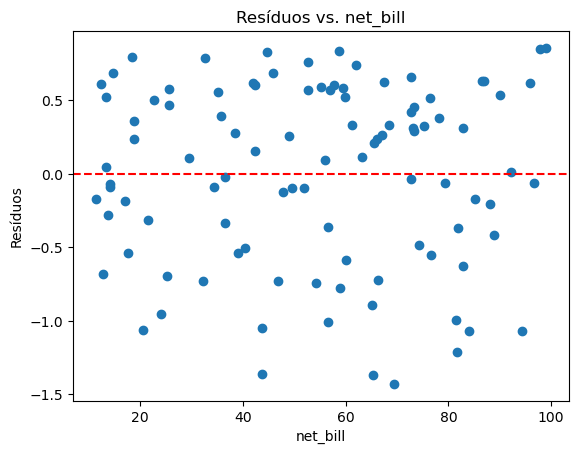

Modelo 2: np.log(tip) ~ np.log(net_bill)
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4068
Date:                Sun, 12 Jan 2025   Prob (F-statistic):              0.525
Time:                        21:05:26   Log-Likelihood:                -93.223
No. Observations:                 100   AIC:                             190.4
Df Residuals:                      98   BIC:                             195.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Interce

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from patsy import dmatrices

# Simulando os dados
np.random.seed(42)
data = pd.DataFrame({
    'tip': np.random.uniform(1, 10, 100),
    'sex': np.random.choice(['Male', 'Female'], 100),
    'smoker': np.random.choice(['Yes', 'No'], 100),
    'time': np.random.choice(['Lunch', 'Dinner'], 100),
    'net_bill': np.random.uniform(10, 100, 100)
})

# Modelo inicial: np.log(tip) ~ sex + smoker + time + net_bill
y, X = dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data, return_type='dataframe')
model1 = sm.OLS(y, X).fit()

print("Modelo 1: np.log(tip) ~ sex + smoker + time + net_bill")
print(model1.summary())

# Gráfico de resíduos
residuals = model1.resid
plt.scatter(data['net_bill'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. net_bill')
plt.show()

# Testando transformações de net_bill
# Modelo 2: np.log(tip) ~ np.log(net_bill)
data['log_net_bill'] = np.log(data['net_bill'])
y, X = dmatrices('np.log(tip) ~ log_net_bill', data, return_type='dataframe')
model2 = sm.OLS(y, X).fit()

print("Modelo 2: np.log(tip) ~ np.log(net_bill)")
print(model2.summary())

# Modelo 3: np.log(tip) ~ np.power(net_bill, 2)
data['net_bill_squared'] = np.power(data['net_bill'], 2)
y, X = dmatrices('np.log(tip) ~ net_bill_squared', data, return_type='dataframe')
model3 = sm.OLS(y, X).fit()

print("Modelo 3: np.log(tip) ~ np.power(net_bill, 2)")
print(model3.summary())

# Comparação com o modelo do Exercício 1
# Modelo do Exercício 1: tip ~ np.power(net_bill, 2)
y, X = dmatrices('tip ~ net_bill_squared', data, return_type='dataframe')
model_ex1 = sm.OLS(y, X).fit()

print("Modelo do Exercício 1: tip ~ np.power(net_bill, 2)")
print(model_ex1.summary())

# Coeficiente de Determinação R² na escala original (tip)
r2_original = model_ex1.rsquared
print(f"Coeficiente de Determinação na escala original (tip): R² = {r2_original:.3f}")


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

Arquivo carregado com sucesso: C:/Users/conta/OneDrive/Área de Trabalho/PAULO/Ciência de Dados/EBAC/Aulas/mod 13/previsao_de_renda.csv
   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Sec

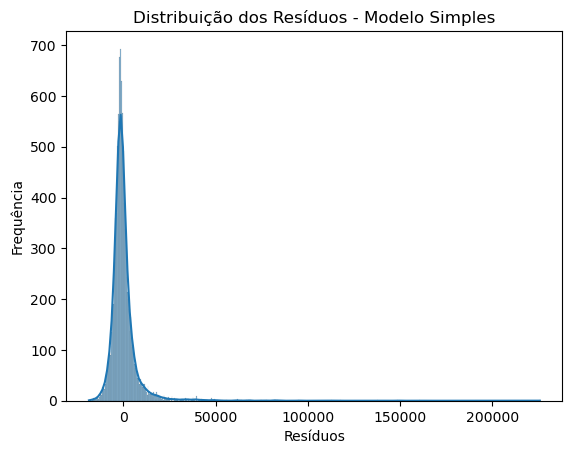

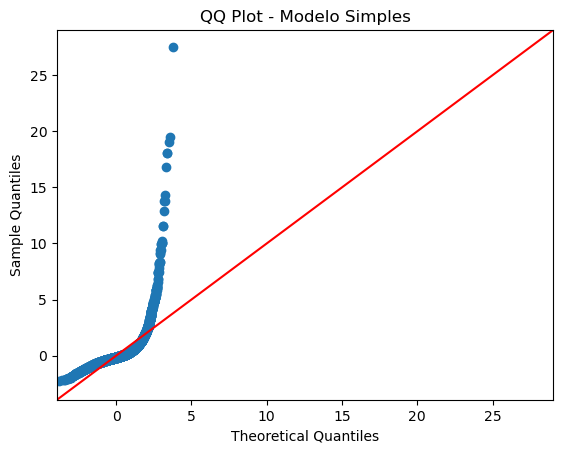

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:38:45   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.8384      0.011    699.851

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [20]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Função para selecionar o arquivo
def selecionar_arquivo():
    root = tk.Tk()
    root.withdraw()  # Esconde a janela principal do tkinter
    caminho_arquivo = filedialog.askopenfilename(
        title="Selecione o arquivo CSV",
        filetypes=(("CSV Files", "*.csv"), ("All Files", "*.*"))
    )
    return caminho_arquivo

# Selecionar o arquivo
file_path = selecionar_arquivo()

# Verificar se o caminho do arquivo foi selecionado
if file_path:
    try:
        # Carregar o arquivo CSV
        base = pd.read_csv(file_path)
        print(f"Arquivo carregado com sucesso: {file_path}")
        print(base.head())  # Visualizar as primeiras linhas dos dados
    except Exception as e:
        print(f"Erro ao carregar o arquivo: {e}")
else:
    print("Nenhum arquivo selecionado!")

# Ajustar o modelo de regressão linear simples
# Variável dependente: renda, Variável independente: tempo_emprego
base = base.dropna(subset=['renda', 'tempo_emprego'])  # Remover valores ausentes

X_simple = base['tempo_emprego']
y_simple = base['renda']
X_simple = sm.add_constant(X_simple)  # Adicionar o termo constante para a regressão

modelo_simples = sm.OLS(y_simple, X_simple).fit()

# Resumo do modelo simples
print(modelo_simples.summary())

# Análise de resíduos para o modelo simples
residuos = modelo_simples.resid
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos - Modelo Simples")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ Plot - Modelo Simples")
plt.show()

# Melhorias no modelo simples
# Transformação logarítmica de renda (se necessário)
base['log_renda'] = np.log(base['renda'])
X_simple_log = sm.add_constant(base['tempo_emprego'])
modelo_simples_log = sm.OLS(base['log_renda'], X_simple_log).fit()

# Resumo do modelo com transformação logarítmica
print(modelo_simples_log.summary())

# Ajustar modelo de regressão múltipla
# Selecionar variáveis explicativas relevantes
variaveis = ["tempo_emprego", "idade", "qtd_filhos", "qt_pessoas_residencia", "posse_de_veiculo", "posse_de_imovel", "sexo", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"]

# Converter variáveis categóricas em variáveis dummy
X_multiplo = base[variaveis]
X_multiplo = pd.get_dummies(X_multiplo, drop_first=True)  # Converter variáveis categóricas
X_multiplo = sm.add_constant(X_multiplo)  # Adicionar a constante
y_multiplo = base['log_renda']

# Ajustar o modelo múltiplo
modelo_multiplo = sm.OLS(y_multiplo, X_multiplo).fit()

# Resumo do modelo múltiplo
print(modelo_multiplo.summary())

# Remover variáveis não significativas (p > 0.05)
variaveis_significativas = modelo_multiplo.pvalues[modelo_multiplo.pvalues < 0.05].index.tolist()
if 'const' not in variaveis_significativas:
    variaveis_significativas.append('const')  # Garantir que a constante esteja incluída

X_multiplo_refinado = X_multiplo[variaveis_significativas]
modelo_refinado = sm.OLS(y_multiplo, X_multiplo_refinado).fit()

# Resumo do modelo refinado
print(modelo_refinado.summary())

# Análise de resíduos para o modelo múltiplo refinado
residuos_multiplo = modelo_refinado.resid
sns.histplot(residuos_multiplo, kde=True)
plt.title("Distribuição dos Resíduos - Modelo Múltiplo Refinado")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

sm.qqplot(residuos_multiplo, line='45', fit=True)
plt.title("QQ Plot - Modelo Múltiplo Refinado")
plt.show()

# Avaliar a qualidade do ajuste
r2_ajustado = modelo_refinado.rsquared_adj
print(f"R² Ajustado do modelo refinado: {r2_ajustado:.4f}")


In [22]:
# Importar bibliotecas necessárias
import pandas as pd
import statsmodels.api as sm

# Carregar o dataset
base = pd.read_csv("C:/Users/conta/OneDrive/Área de Trabalho/PAULO/Ciência de Dados/EBAC/Aulas/mod 13/previsao_de_renda.csv")

# Exibir as primeiras linhas do dataframe para entendimento
print(base.head())

# Convertendo variáveis categóricas para variáveis numéricas
base = pd.get_dummies(base, drop_first=True)

# Verificar as colunas do dataframe após a transformação
print(base.columns)

# Garantir que a variável resposta (renda) e as variáveis preditoras sejam numéricas
base['log_renda'] = base['renda'].apply(lambda x: pd.np.log(x))  # Transformando a renda em logaritmo

# Seleção de variáveis independentes (remover as colunas de 'renda' e 'log_renda' que são variáveis dependentes)
X_multiplo = base.drop(columns=['renda', 'log_renda'])  # Remover as colunas que não serão usadas no modelo

# Adicionar constante ao modelo (termo de interceptação)
X_multiplo = sm.add_constant(X_multiplo)

# Variável dependente (usar 'log_renda' como variável dependente)
y_multiplo = base['log_renda']

# Ajustar o modelo de regressão múltipla
modelo_multiplo = sm.OLS(y_multiplo, X_multiplo).fit()

# Exibir o resumo do modelo
print(modelo_multiplo.summary())


   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

AttributeError: module 'pandas' has no attribute 'np'